In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [8]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Convert 'male'/'female' to 0/1
df['Embarked'] = le.fit_transform(df['Embarked'])  # Convert 'S'/'C'/'Q' to 0/1/2

In [9]:
print("\nData after encoding:")
print(df.head())


Data after encoding:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


In [10]:
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train_id3 = X_train.copy()
X_test_id3 = X_test.copy()

In [13]:
bins_age = [0, 12, 18, 35, 60, 100]
labels_age = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
X_train_id3['Age'] = pd.cut(X_train_id3['Age'], bins=bins_age, labels=labels_age)
X_test_id3['Age'] = pd.cut(X_test_id3['Age'], bins=bins_age, labels=labels_age)

In [14]:
bins_fare = [0, 10, 20, 30, 50, 100, 600]
labels_fare = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Luxury']
X_train_id3['Fare'] = pd.cut(X_train_id3['Fare'], bins=bins_fare, labels=labels_fare)
X_test_id3['Fare'] = pd.cut(X_test_id3['Fare'], bins=bins_fare, labels=labels_fare)

In [15]:
for col in X_train_id3.columns:
    X_train_id3[col] = X_train_id3[col].astype('category')
    X_test_id3[col] = X_test_id3[col].astype('category')

In [17]:
X_train_id3['Age'] = X_train_id3['Age'].astype('category').cat.codes
X_test_id3['Age'] = X_test_id3['Age'].astype('category').cat.codes

# If 'Fare' is also discretized into categories, encode it too
X_train_id3['Fare'] = X_train_id3['Fare'].astype('category').cat.codes
X_test_id3['Fare'] = X_test_id3['Fare'].astype('category').cat.codes

In [18]:
id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_tree.fit(X_train_id3, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

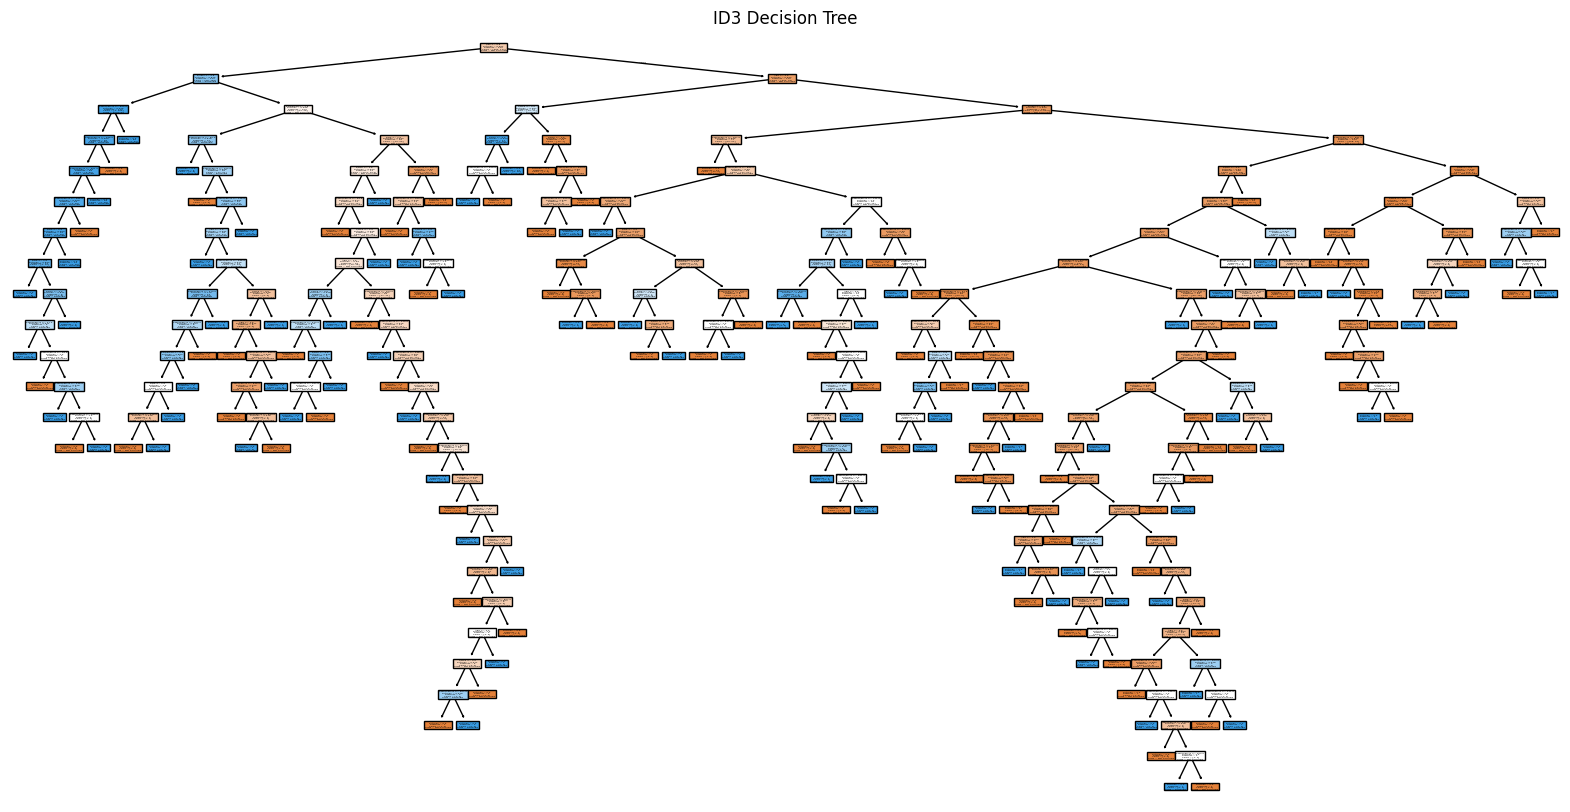

In [19]:
plt.figure(figsize=(20,10))
plot_tree(id3_tree, feature_names=X_train_id3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("ID3 Decision Tree")
plt.show()

In [20]:
c45_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
c45_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

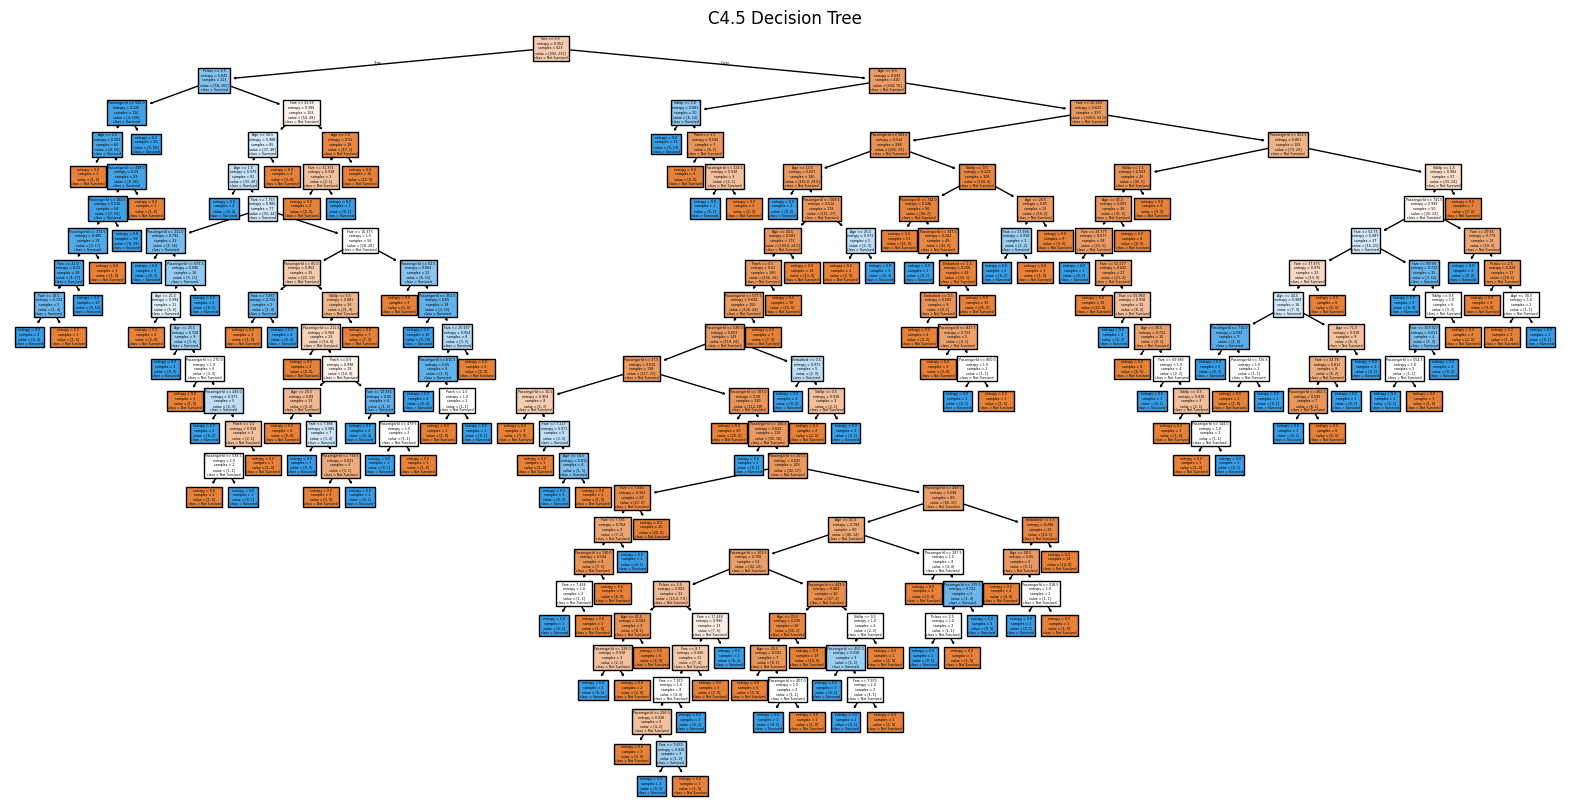

In [21]:
plt.figure(figsize=(20,10))
plot_tree(c45_tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("C4.5 Decision Tree")
plt.show()

In [22]:
cart_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

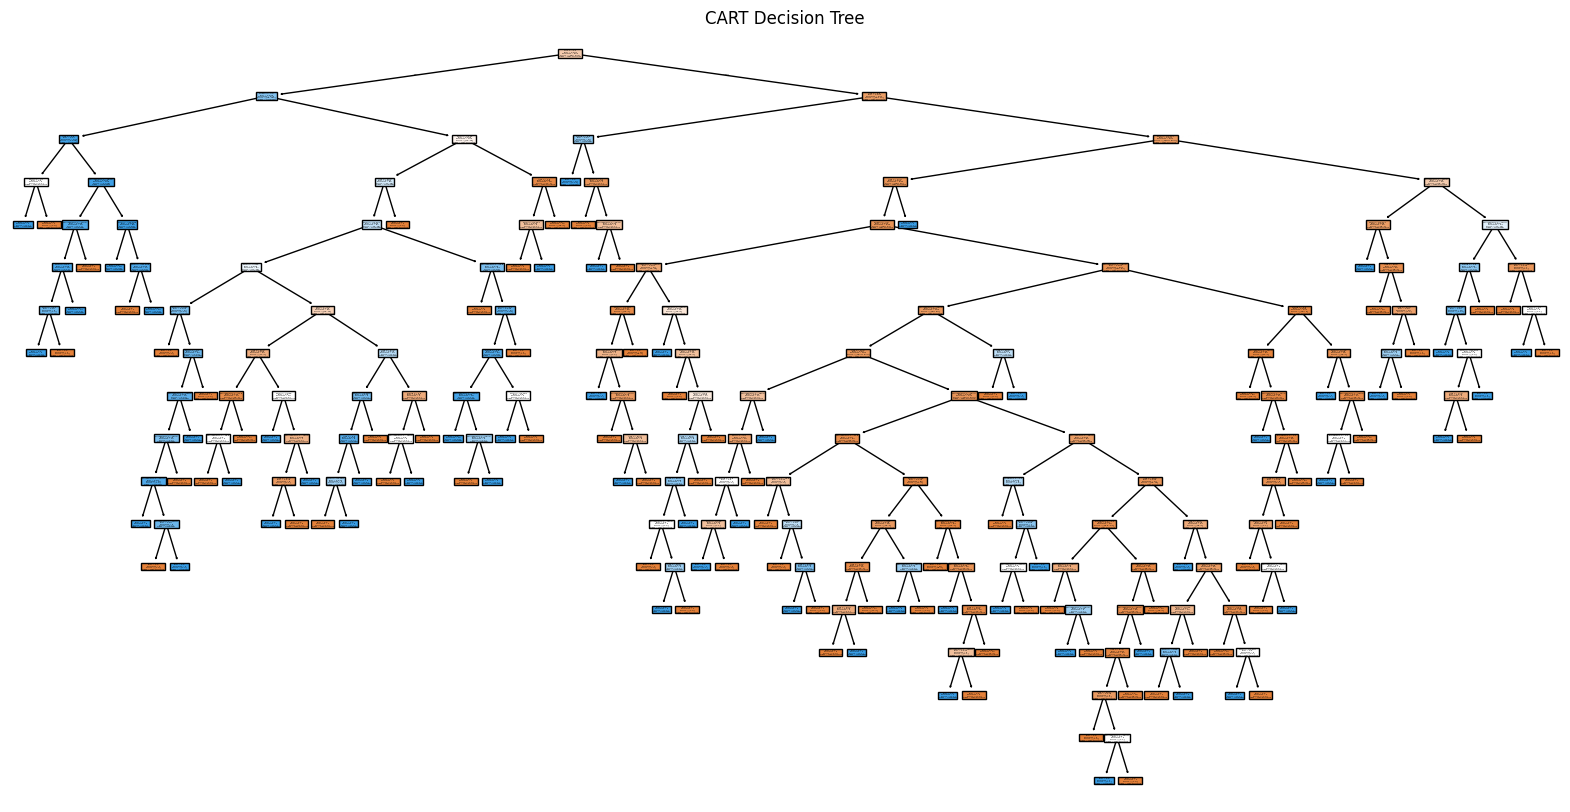

In [23]:
plt.figure(figsize=(20,10))
plot_tree(cart_tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("CART Decision Tree")
plt.show()

In [24]:
pre_pruned_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, random_state=42)
pre_pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

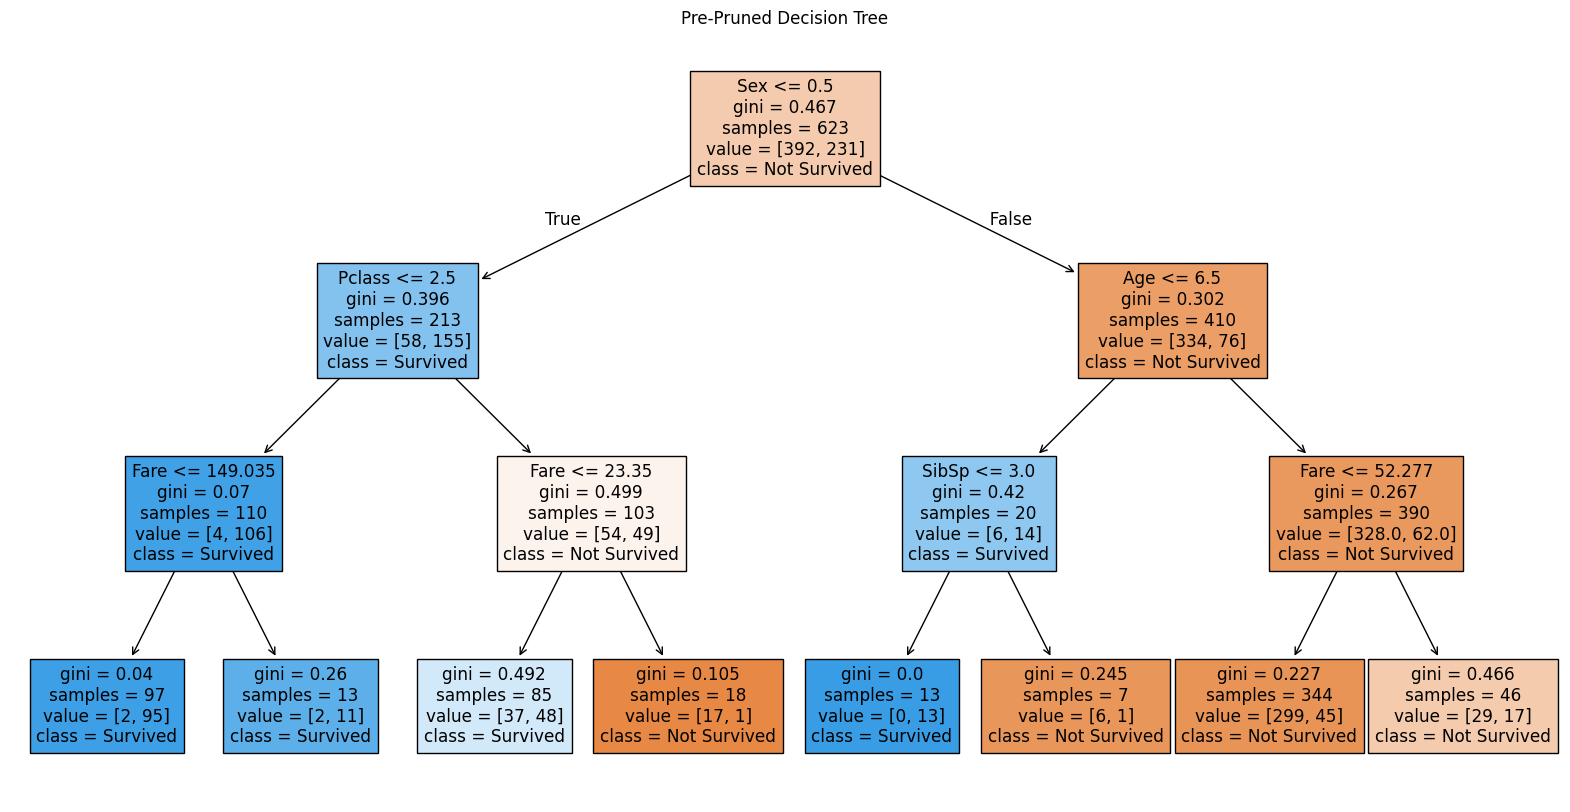

In [25]:
plt.figure(figsize=(20,10))
plot_tree(pre_pruned_tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Pre-Pruned Decision Tree")
plt.show()

In [26]:
path = cart_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [27]:
best_alpha = 0
best_accuracy = 0
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = ccp_alpha

post_pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
post_pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0047813882107149985),
                       random_state=42)

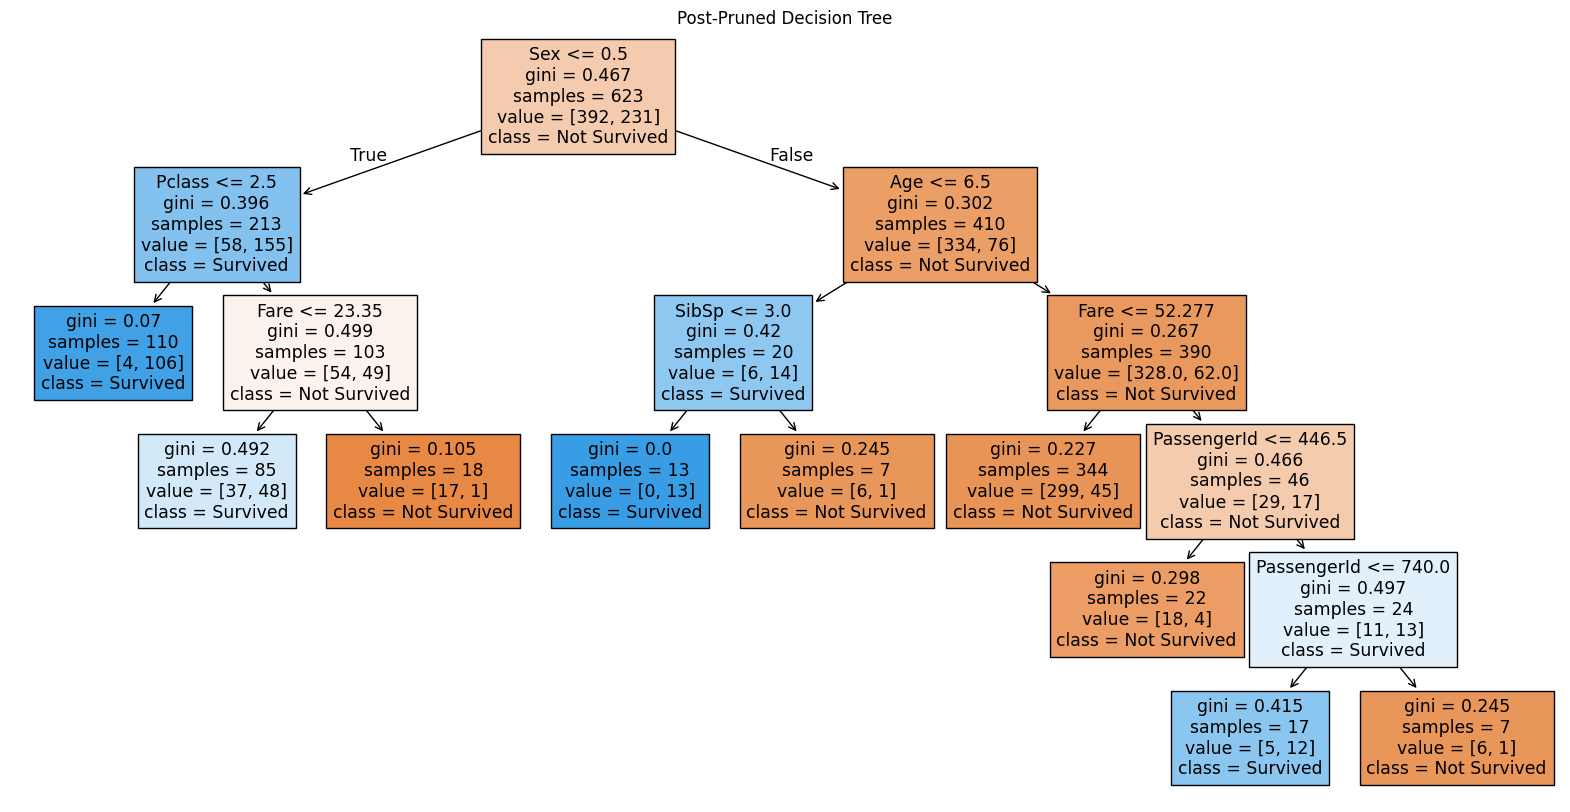

In [28]:
plt.figure(figsize=(20,10))
plot_tree(post_pruned_tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Post-Pruned Decision Tree")
plt.show()

In [29]:
y_pred_id3 = id3_tree.predict(X_test_id3)
y_pred_c45 = c45_tree.predict(X_test)
y_pred_cart = cart_tree.predict(X_test)
y_pred_pre_pruned = pre_pruned_tree.predict(X_test)
y_pred_post_pruned = post_pruned_tree.predict(X_test)

In [30]:
print("\nModel Accuracy Scores:")
print("ID3 Accuracy:", accuracy_score(y_test, y_pred_id3))
print("C4.5 Accuracy:", accuracy_score(y_test, y_pred_c45))
print("CART Accuracy:", accuracy_score(y_test, y_pred_cart))
print("Pre-Pruned Accuracy:", accuracy_score(y_test, y_pred_pre_pruned))
print("Post-Pruned Accuracy:", accuracy_score(y_test, y_pred_post_pruned))


Model Accuracy Scores:
ID3 Accuracy: 0.746268656716418
C4.5 Accuracy: 0.8059701492537313
CART Accuracy: 0.7910447761194029
Pre-Pruned Accuracy: 0.8097014925373134
Post-Pruned Accuracy: 0.8134328358208955
